# Popular Data Science Questions

In this project, I am going to find out the most popular data science questions in [Stack Exchange](https://datascience.stackexchange.com/). Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science. Data Science Stack Exchange (DSSE) is the source of the database of this project.

### Summary of results
- The most used tag is machine_learning. It has been used 2693 times, about 30% of all the questions. The second and third most used tag are python and deep-learning respectively.
- The most viewed tag is python. the posts with this tag have been viewed in total 537585 times. The second and third most used tag are machine-learning and keras respectively.

## Reading in Data

In [168]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# read in csv, parse date columns
questions = pd.read_csv('2019_questions.csv', parse_dates = ['CreationDate'])

## Exploring the data

In [169]:
# show the first few rows
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN


In [170]:
# explore the columns
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 483.5+ KB


We can see that missing values exist in FavoriteCount. For all 8839 entries, there are only 1407 values in FavoriteCount. For entries with with no value in FavourCount, it's believed that the post do not exist in any user's 'favourite' list. Therefore, the missing values can be replaced with zero.

The types of columns seem adequate. However, the type of FavourCount can be changed to integar.

On Stack Exchange, every post can have maximum 5 tags. The column Tags can be changed to a list with tags.

## Cleaning data

In [171]:
# fill in missing data
questions['FavoriteCount'].fillna(0, inplace = True)
# update column type
questions['FavouriteCount'] = questions['FavoriteCount'].astype(int)

# confirm results

questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 8 columns):
Id                8839 non-null int64
CreationDate      8839 non-null datetime64[ns]
Score             8839 non-null int64
ViewCount         8839 non-null int64
Tags              8839 non-null object
AnswerCount       8839 non-null int64
FavoriteCount     8839 non-null float64
FavouriteCount    8839 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 552.5+ KB


In [172]:
# modify Tags column
questions['Tags'] = questions['Tags'].str.replace('^<|>$', '').str.split('><')
questions.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount,FavouriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0.0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0.0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0.0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0.0,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0.0,0


## Most used and most viewed tags

In this session, the most used tags will be found out. The number of views will be counted to determine the most popular tags.

In [173]:
# create empty tag_count dict
tag_count = {}

# use for loop to count tags
for tags in questions['Tags']:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

# convert tag_count to DataFrame
tag_count = pd.DataFrame.from_dict(tag_count, orient = 'index')
# name column to counts
tag_count = tag_count.rename(columns = {0: 'counts'})

In [174]:
# sort values by counts
tag_count.sort_values(by = 'counts', ascending = False, inplace = True)

# show the top 10 most used tags
tag_count.head(10)

,counts
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


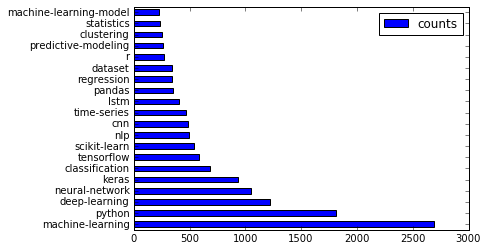

In [175]:
# plot bar chart showing most used tags
tag_count.head(20).plot(kind = 'barh')

The most used tag is machine_learning. It has been used 2693 times, about 30% of all the questions. The second and third most used tag are python and deep-learning respectively.

Now we will count how many times each tag was viewed.

In [176]:
# create empty tag_view_count dict
tag_view_count = {}

# use for loop to count tag views
for row in questions.itertuples(): # or iterrows
    for tag in row.Tags:
        if tag in tag_view_count:
            tag_view_count[tag] += row.ViewCount
        else:
            tag_view_count[tag] = row.ViewCount

# convert tag_count to DataFrame
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient = 'Index')
# name column to view_count
tag_view_count.rename(columns = {0: 'view_counts'}, inplace = True)

In [177]:
# sort list by view counts
tag_view_count.sort_values(by = 'view_counts', ascending = False, inplace = True)

# show the top 10 most viewed tags
tag_view_count.head(10)

,view_counts
python,537585
machine-learning,388499
keras,268608
deep-learning,233628
pandas,201787
neural-network,185367
scikit-learn,128110
tensorflow,121369
classification,104457
dataframe,89352


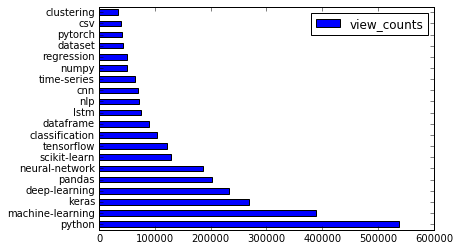

In [178]:
# plot bar chart showing most viewed tags
tag_view_count.head(10).plot(kind = 'barh')

The most viewed tag is python. the posts with this tag have been viewed in total 537585 times. The second and third most used tag are machine-learning and keras respectively.

## Interim conclusion

So far I have found out the most used and most viewed tags in Data Science Stack Exchange (DSSE).

## Further study

For further study, I will find the relationships between tags and the growth path of data science topics.